Crosland Agathe
ICE 2019

The aim of this program is to find words from a list (here the 3000 most common words in english language) in a proteic sequence (here the human proteome).

Unfortenately, there is already a very handful function to do that in python: in, that I'm not sure we were allow to use), so I only use it to give some time by selecting only the words that were actually in the proteome and then count how many time they appear and where.

The big steps of this program are:
- import the two files in a necessary format (a list of string in majuscule (because letters in proteome are majuscule and a and A are two different things for python) for the words and a continous list of letters for the proteome.
--> functions : readFastaFile1(filename) and read_a_list_of_words_into_majuscule (filename)
- find the words among the 3000 words that are in the proteom
--> function : interesting_list_in_list (list_to_sort,list_of_ref)
- find how many time each word actually in the proteome appears in it
--> function : how_many_time(to_count,list_of_ref)
- find where they are in the proteome, this function depend of an input of the user because the program is way longer with this option
--> function : where_are_words (list_of_word,list_of_ref)
- create an histogram of how many words of n number of letter are in the proteome
--> functions : count_lenght_words_and_occuring (list_word,list_number_occuring) and
hist_count_letter (nb_letter,nb_word_n_letter)
- user can enter a letter to have a dataframe with the word beginning by the input, how many time these words appear in the proteome and (if the user choose to have it) their positions.

# Useful package(s)

In [31]:
import matplotlib.pyplot as plt
    #To do graph
import pandas as pd
    #Use to create dataframe

# Functions to import data files

In [32]:
#Function to import a fasta file ((c) ebecker)

# readFastaFile1
# PARAMETERS : the filename (the file is in fasta format)
# RETURNS : a unique string with all the protein sequences concatenated

def readFastaFile1(filename) :
    
    # opening the file whose name is filename
    fd = open(filename,'r')
    txt = fd.read()
    fd.close()
    
    # txt contains all the text of the file. 
    # fisrt, I want to seperate the proteins, the symbol that starts a new protein is '>'
    seqs = txt.split('>')[1:]
    s = ""
    
    for seq in seqs :
        lines = seq.split('\n')[1:]     
        for line in lines :
            s = s + line
    return(s)



def read_a_list_of_words_into_majuscule (filename) :
    txt = open (filename, 'r') 
    w =[]
    for line in txt:
        #For all the lines find in the file the following lines create a string and concatene it to the list
        line=line.upper()
            #To have only majuscule to compare with proteom
        line = line.split()
            #The line is a string...
        w.extend(line)
            #... and this string become an element of the list
    txt.close()
    
    return(w)
        #We return the list of string

# Function to find what are the words are in an other 

In [33]:
def interesting_list_in_list (list_to_sort,list_of_ref) :
    # This function take a first list (list_to_sort) and by comparing with an other list (list_of_ref), find the elements
    #of the first present in the second ...
    lighter_list=[]
        # ... and put the element found in a new list.
    for string in list_to_sort :
        #To do it, I run on all the element of the first list ...
        if string in list_of_ref :
            # ... and use "in" to determine if the element is in the reference list ...
            lighter_list.append(string)
                #... if it's the case, I put the element in the new list
                
    return(lighter_list)
        #The function return the list of the element of list_to_sort found in list_of_ref

#Obviously, this function alone can be use to find what are the words found in the proteome,
#but it's not funny so we are also going to finf how many time and where they are in the proteome

# Counting occurence of a word in proteome

In [34]:
def how_many_time(to_count,list_of_ref):
    how_many=[]
        #Create a space to stock the count
    for word in to_count :
        how_many_word=list_of_ref.count(word)
            #Again a very useful function in python: count
        how_many.append(how_many_word)
            #add a new element, corresponding to the number of occurence of word
            
    return(how_many)

# Find positions of words in proteome

In [35]:
def where_are_words (list_of_word,list_of_ref) :
    
    l_list_of_word=len(list_of_word)
    
    where=[[] for i in range(l_list_of_word)]
        #Creation of a list of empty list to store the positions for each word
    dict_where=dict(zip(list_of_word,where))
        #Use of a dictionnary to recover the position of every word because it allow to identify
        #easily thank to the key where to store the position value
        
    l_list_of_ref = len(list_of_ref)
        #length of the ref list
        
    for amino_acid in range(0,l_list_of_ref) :
        #Browse the element of the ref list
        
        for word in list_of_word :
            #Browse the list of words
            where_word=list(dict_where[word])
            l_word=len(word)
                #Lenght of the word to cut a subset of proteome with the same size ...
            if list_of_ref[amino_acid] == word[0] :
                if amino_acid + l_word <= l_list_of_ref : 
                    #If there is enough letters in the remain of proteome...
                    sub_list_of_ref=list_of_ref[amino_acid : amino_acid + l_word]
                        # .. use the lenght of the word to cut a subset of proteome with the same size.
                    if word == sub_list_of_ref :
                    #If the sub part of proteome is the considered word...
                        dict_where[word].append(amino_acid)
                            #... where_word store the position of the first letter in the proteome
            #For each word in words_in_proteome, the list of positions is store in the corresponding
            #value for the considered word
            
            #NB: this for loop can be use to do all we want (replace interesting_list_in_list and the previous loop that
            # count the number of each word occurence) with tiny modifications
    
    where=list(dict_where.values())
    
    return(where)

# Functions to do an histogram giving the number of words with a number of letter found in the proteom

In [36]:
def count_lenght_words_and_occuring (list_word,list_number_occuring) :
    
    l_words=[]
        #Storage space for the length of words
    for word_i in range(0,len(list_word)) :
        l_words.append(len(list_word[word_i]))
            #Fill the storage with the length of each word
    
    #Recover the min and max...
    min_l=min(l_words)
    max_l=max(l_words)
    
    l_words=[i for i in range(min_l,max_l+1)]
       #... to create a  list of possible length 
    
    count_l_word=[0 for i in range(min_l,max_l+1)]
        #Storage space for the number of occurence of words of each length
    for word_i in range(0,len(list_word)) :
        # For each word ...
        for l in range(0,len(l_words)) :
            # ... and for each possible length ...
            if len(list_word[word_i]) == l_words[l] :
                #... if the length of the word is egal to the consider length ...
                count_l_word[l]=count_l_word[l] + list_number_occuring[word_i]
                    #... we add the number of occurence to the ones of other words with the same length.
    
    return(l_words,count_l_word)

def hist_count_letter (nb_letter,nb_word_n_letter) :
    plt.bar(nb_letter,nb_word_n_letter)
        #Create histogram
    plt.title("Number of occuring found according to words size (one letter included)")
        #Add a title
    plt.show()
        #Show the graph
    
    # The one letter appear too much time, we can remove them:
    if nb_letter[0]==1 :
        nb_letter.pop(0)
        nb_word_n_letter.pop(0)
        plt.bar(nb_letter,nb_word_n_letter)
        plt.title("Number of occuring found according to words size (only more than one letter)")
        plt.show()

# User can choose a letter to have all words in proteome that begin with it, how many time they appear and where (optional)

In [37]:
def user_rules(list_words_in_ref,list_of_ref,count_word_in_ref,position_word_in_ref):
    
    #User enter a letter (or something else, it just not going to work)
    to_extract=str(input("You can enter a letter.\n"
                         + "This program will make you a list of words from the 3000 most common english words \n"
                         + "that begin with this letter and are contained in the proteome\n"
                         + "Please enter your letter: "))
    
    # Just to check the input is correct
    while not(len(to_extract)==1):
            to_extract=str(input("You can enter only ONE letter \n"
                                 +"(if you want you can enter a number but there is no number in the proteome.\n"
                                 + "Please enter your letter: "))
            
    to_extract=to_extract.upper()
        #User can enter a letter, we put it in majuscule because all letter in proteome are.
    
    #Create stockages
    words_interesting=[]
    how_many=[]
    where=[]
    if to_extract in list_of_ref :
        #if the input is in the proteome, we can search for word beginning by it
        for word_i in range(0,len(list_words_in_ref)) :
            # For each word found in ref ...
            if to_extract == list_words_in_ref[word_i][0] :
                # ... if the first letter of the word is the input ...
                words_interesting.append(list_words_in_ref[word_i])
                    # ... this word is added to the list of word to return ...
                how_many.append(count_word_in_ref[word_i])
                    # ... as the number of time it appear in ref ...
                
                if not(position_word_in_ref == []):
                    where.append(position_word_in_ref[word_i])
                        # ... and the positions of the words if the user choose this option
                        
        #Create a dataframe to print as result
        if where == [] :
            synthesis=pd.DataFrame({'Word' : words_interesting, 'Occurence' : how_many})
        else :
            synthesis=pd.DataFrame({'Word' : words_interesting, 'Occurence' : how_many, 'Positions' : where})
        
        return(synthesis)
    
    # If nothing found, print a message to say it
    if words_interesting==[] :
        print("Your proposition isn't available in the words from the 3000 most common english words found in proteome")   

# All functions together

In [38]:
def find_words_count_where(words_to_find,where_to_search):
    
    where_or_not = str(input("Do you need the positions of words in the proteome (it will take more time)? Y/N: "))
    print("") #Just to have more space
    while not(where_or_not== "Y" or where_or_not=="N") :
        print("The only accepted answer are Y or N")
        where_or_not = str(input("Do you need the positions of words in the proteome? Y/N: "))
        print("")
    
    #Import the list of words to find and the human proteome
    
    words=read_a_list_of_words_into_majuscule(words_to_find)
        #Import the list of the 3000 most common words in english as a list of list of letters
    proteome = readFastaFile1(where_to_search)
        #Import the human proteom as a list of letters
    l_proteome=len(proteome)
        #Lenght of proteome
    
    #Reduce the words to the one that are actually in proteome
    words_in_proteome=interesting_list_in_list(words,proteome)
    l_words_in_proteome=len(words_in_proteome)
        #It highly reduce the number of words to find in proteome
    print(l_words_in_proteome, " words found.")
    print("")
    
    #How many time these words appear in the proteome
    how_many=how_many_time(words_in_proteome,proteome)
    
    #Where they are
    if where_or_not =="Y" :
        where=where_are_words(words_in_proteome,proteome)
    else :
        where=[]
    
    #Count the length of words found and how many each length is found to do a histogram
    for_hist = count_lenght_words_and_occuring (words_in_proteome,how_many)
    #Do the histogram
    hist_count_letter (for_hist[0],for_hist[1])
    
    # Ask if the user want more detailed informations
    more_info = str(input("Do you want more information? Y/N: "))
    print("")
    
    info= " "
    # Just check if the answer is valid
    while not(more_info== "Y" or more_info=="N") :
        print("The only accepted answer are Y or N")
        more_info = str(input("Do you want more information? Y/N: "))
        print("")
    
    while more_info=="Y" :
        #To allow user to extract informations
        info=user_rules(words_in_proteome,proteome,how_many,where)
        print("info",info)
        print("")
        # If the user want more info, we do a new loop
        more_info = str(input("Do you want more information? Y/N: "))
        print("")
    
    #Create a dataframe to print as result
    if where == [] :
        synthesis=pd.DataFrame({'Word' : words_in_proteome, 'Occurence' : how_many})
    else :
        synthesis=pd.DataFrame({'Word' : words_in_proteome, 'Occurence' : how_many, 'Positions' : where})
        
    return(synthesis,info)
        #Function return all the informations and the last more detailed information asked by the user
        # I choose to not print all information but can be easily change

# Run everything

Do you need the positions of words in the proteome (it will take more time)? Y/N: N

238  words found.



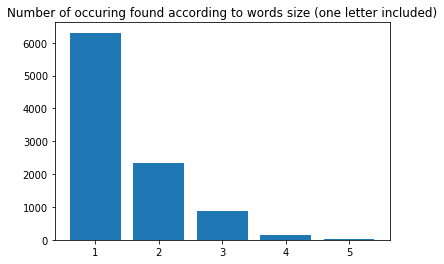

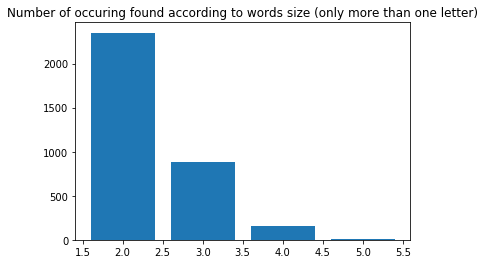

Do you want more information? Y/N: Y

You can enter a letter.
This program will make you a list of words from the 3000 most common english words 
that begin with this letter and are contained in the proteome
Please enter your letter: A
info      Word  Occurence
0       A       4048
1     ACT          3
2      AD        227
3     ADD         79
4     AGE         15
5      AH         78
6     AID          4
7    AIDS          1
8     AIM          2
9     AIR         11
10    ALL         38
11     AM         80
12    AND          5
13    ANY          2
14  APPLE          1
15   AREA          2
16    ARM          4
17    ART         13
18     AS        342
19    ASK         13
20     AT        215

Do you want more information? Y/N: N



In [39]:
every_inf=find_words_count_where("english-words.txt","human-proteome-small.fasta")